In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [22]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Definindo o diretório do arquivo no Google Drive
caminho_arquivo_1 = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/classification/credit_card_processed_kmeans_K2.csv'


In [31]:
caminho_arquivo_2 = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/classification/credit_card_processed_hierarquico_K6.csv'

In [29]:
caminho_arquivo_3 = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/classification/credit_card_processed_kmeans_K5.csv'

In [33]:
df_kmeans_k2 = pd.read_csv(caminho_arquivo_1)
df_kmeans_k2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans
0,C10001,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960378,-0.528979,-0.297310,0.000000,0.360680,1
1,C10002,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688678,0.818642,0.102042,0.222222,0.360680,1
2,C10003,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826100,-0.383805,-0.088489,0.000000,0.360680,1
3,C10004,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826100,-0.598688,-0.357035,0.000000,0.360680,1
4,C10005,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905410,-0.364368,-0.252238,0.000000,0.360680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-0.737950,1.000000,-0.333293,-0.356934,-0.132643,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.486217,-0.336106,0.500000,-4.122768,1
8946,C19187,-0.742423,1.000000,-0.329136,-0.356934,-0.122823,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.503396,-0.357035,0.000000,-4.122768,1
8947,C19188,-0.740398,0.833333,-0.401965,-0.356934,-0.294893,-0.466786,0.833333,0.000000,0.666667,0.000000,-0.476070,-0.390639,-0.960378,-0.570615,-0.321751,0.250000,-4.122768,1
8948,C19189,-0.745174,0.833333,-0.469552,-0.356934,-0.454576,-0.449352,0.000000,0.000000,0.000000,0.166667,-0.182998,-0.591796,-1.097800,-0.580536,-0.333166,0.250000,-4.122768,1


In [32]:
df_hierarquico_k6 = pd.read_csv(caminho_arquivo_2)
df_hierarquico_k6

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_Hierarquico
0,C10001,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960378,-0.528979,-0.297310,0.000000,0.360680,1
1,C10002,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688678,0.818642,0.102042,0.222222,0.360680,0
2,C10003,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826100,-0.383805,-0.088489,0.000000,0.360680,0
3,C10004,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826100,-0.598688,-0.357035,0.000000,0.360680,0
4,C10005,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905410,-0.364368,-0.252238,0.000000,0.360680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-0.737950,1.000000,-0.333293,-0.356934,-0.132643,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.486217,-0.336106,0.500000,-4.122768,3
8946,C19187,-0.742423,1.000000,-0.329136,-0.356934,-0.122823,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.503396,-0.357035,0.000000,-4.122768,3
8947,C19188,-0.740398,0.833333,-0.401965,-0.356934,-0.294893,-0.466786,0.833333,0.000000,0.666667,0.000000,-0.476070,-0.390639,-0.960378,-0.570615,-0.321751,0.250000,-4.122768,3
8948,C19189,-0.745174,0.833333,-0.469552,-0.356934,-0.454576,-0.449352,0.000000,0.000000,0.000000,0.166667,-0.182998,-0.591796,-1.097800,-0.580536,-0.333166,0.250000,-4.122768,3


In [30]:
df_kmeans_k5 = pd.read_csv(caminho_arquivo_3)
df_kmeans_k5

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans_K5
0,C10001,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960378,-0.528979,-0.297310,0.000000,0.360680,2
1,C10002,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688678,0.818642,0.102042,0.222222,0.360680,1
2,C10003,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826100,-0.383805,-0.088489,0.000000,0.360680,2
3,C10004,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826100,-0.598688,-0.357035,0.000000,0.360680,2
4,C10005,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905410,-0.364368,-0.252238,0.000000,0.360680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-0.737950,1.000000,-0.333293,-0.356934,-0.132643,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.486217,-0.336106,0.500000,-4.122768,2
8946,C19187,-0.742423,1.000000,-0.329136,-0.356934,-0.122823,-0.466786,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.960378,-0.503396,-0.357035,0.000000,-4.122768,2
8947,C19188,-0.740398,0.833333,-0.401965,-0.356934,-0.294893,-0.466786,0.833333,0.000000,0.666667,0.000000,-0.476070,-0.390639,-0.960378,-0.570615,-0.321751,0.250000,-4.122768,2
8948,C19189,-0.745174,0.833333,-0.469552,-0.356934,-0.454576,-0.449352,0.000000,0.000000,0.000000,0.166667,-0.182998,-0.591796,-1.097800,-0.580536,-0.333166,0.250000,-4.122768,2


## 🛠️ Padronização dos Datasets para Classificação

Nesta etapa, realizamos a renomeação das colunas de alvo (*target*) em cada um dos três datasets gerados pelas técnicas de clustering (**K-Means K2**, **K-Means K5** e **Hierárquico K6**).

### Motivação
Como cada algoritmo de agrupamento nomeou sua coluna de saída de forma distinta, a padronização para o nome genérico `cluster` permite:
* **Automação:** Utilizar a mesma função de pré-processamento e treino para todos os arquivos.
* **Escalabilidade:** Facilitar a inclusão de novos modelos de agrupamento no futuro.
* **Redução de Erros:** Evitar confusão de variáveis durante a separação de dados entre treino e teste.

### Implementação

O código abaixo renomeia as colunas específicas de cada técnica para uma nomenclatura única:

```python
# Padronizando o nome da variável alvo para 'cluster' em todos os DataFrames
df_kmeans_k2 = df_kmeans_k2.rename(columns={'cluster_kmeans': 'cluster'})
df_hierarquico_k6 = df_hierarquico_k6.rename(columns={'cluster_Hierarquico': 'cluster'})
df_kmeans_k5 = df_kmeans_k5.rename(columns={'cluster_kmeans_K5': 'cluster'})

In [34]:
df_kmeans_k2 = df_kmeans_k2.rename(columns={'cluster_kmeans': 'cluster'})
df_hierarquico_k6 = df_hierarquico_k6.rename(columns={'cluster_Hierarquico': 'cluster'})
df_kmeans_k5 = df_kmeans_k5.rename(columns={'cluster_kmeans_K5': 'cluster'})

## 🧹 Limpeza e Remoção de Identificadores (Feature Selection)

Para que os algoritmos de classificação foquem apenas nos atributos comportamentais dos dados, removemos a coluna de identificação do cliente (`CUST_ID`).

### Motivação
Identificadores únicos, como IDs ou nomes, não possuem valor preditivo. Manter essas colunas no dataset de treinamento pode confundir o modelo ou causar **overfitting**, onde o algoritmo "decora" o ID em vez de aprender os padrões reais que definem cada cluster.

### Implementação

```python
# Removendo a coluna CUST_ID de todos os DataFrames de forma definitiva
df_kmeans_k2.drop(columns=['CUST_ID'], inplace=True)
df_hierarquico_k6.drop(columns=['CUST_ID'], inplace=True)
df_kmeans_k5.drop(columns=['CUST_ID'], inplace=True)

In [38]:
df_kmeans_k2.drop(columns=['CUST_ID'], inplace=True)
df_hierarquico_k6.drop(columns=['CUST_ID'], inplace=True)
df_kmeans_k5.drop(columns=['CUST_ID'], inplace=True)

## 📊 Divisão dos Conjuntos de Treinamento e Teste (Holdout)

Para avaliar o desempenho dos modelos de classificação de forma imparcial, aplicamos a estratégia de **Holdout**, separando os dados originais em dois conjuntos distintos para cada configuração de cluster (K2, K5 e K6).

### Configuração da Divisão
* **Proporção:** 80% para treinamento e 20% para teste.
* **Reprodutibilidade:** Utilizado `random_state=42` para garantir que a divisão seja idêntica em futuras execuções.
* **Isolamento:** Os dados de teste foram completamente isolados e só serão utilizados após o treinamento e validação cruzada para medir a acurácia final.

### Estrutura de Variáveis
As variáveis foram nomeadas seguindo o padrão `X_train_[técnica]`, `y_test_[técnica]`, facilitando a chamada nos algoritmos subsequentes:
- `k2`: Referente ao agrupamento K-Means com 2 clusters.
- `k5`: Referente ao agrupamento K-Means com 5 clusters.
- `h6`: Referente ao agrupamento Hierárquico com 6 clusters.

In [42]:
# Função para automatizar a separação de qualquer um dos seus dataframes
def separar_treino_teste(df):
    # Definindo X (características) e y (alvo/cluster)
    X = df.drop(columns=['cluster'])
    y = df['cluster']

    # Divisão 80/20 com semente aleatória para reprodutibilidade
    return train_test_split(X, y, test_size=0.20, random_state=42)

# --- Executando a separação para os 3 cenários ---

# 1. Dataset K-Means (K=2)
X_train_k2, X_test_k2, y_train_k2, y_test_k2 = separar_treino_teste(df_kmeans_k2)

# 2. Dataset K-Means (K=5)
X_train_k5, X_test_k5, y_train_k5, y_test_k5 = separar_treino_teste(df_kmeans_k5)

# 3. Dataset Hierárquico (K=6)
X_train_h6, X_test_h6, y_train_h6, y_test_h6 = separar_treino_teste(df_hierarquico_k6)

# Conferência de integridade
print(f"Check K2: Treino {X_train_k2.shape} | Teste {X_test_k2.shape}")
print(f"Check K5: Treino {X_train_k5.shape} | Teste {X_test_k5.shape}")
print(f"Check H6: Treino {X_train_h6.shape} | Teste {X_test_h6.shape}")

Check K2: Treino (7160, 17) | Teste (1790, 17)
Check K5: Treino (7160, 17) | Teste (1790, 17)
Check H6: Treino (7160, 17) | Teste (1790, 17)


In [50]:
X_train_k2.shape, X_test_k2.shape, y_train_k2.shape, y_test_k2.shape

((7160, 17), (1790, 17), (7160,), (1790,))

## ⚖️ Classificação com Naive Bayes (GaussianNB)

O primeiro algoritmo de classificação testado foi o **Naive Bayes Gaussiano**. Este modelo foi escolhido como *baseline* por sua eficiência computacional e simplicidade.

### Por que GaussianNB?
* **Dados Contínuos:** Adequado para datasets onde as variáveis independentes seguem uma distribuição normal (gaussiana).
* **Independência de Atributos:** O modelo assume que as características não possuem correlação entre si, simplificando o cálculo de probabilidade.

### Metodologia de Avaliação
Utilizamos a **Validação Cruzada (10-Fold Cross-Validation)** nos dados de treinamento para obter uma métrica de acurácia robusta, minimizando variações estatísticas.



In [69]:
from sklearn.metrics import precision_recall_fscore_support

# Instanciando o modelo
nb_model = GaussianNB()

# Função ajustada para incluir Precision, Recall e F1-Score
def avaliar_naive_bayes(X_train, y_train, X_test, y_test, nome_cenario):
    # 1. K-Fold (10 dobras) nos dados de treino
    scores = cross_val_score(nb_model, X_train, y_train, cv=10)

    # 2. Treino e Predição para obter Precision, Recall e F1
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)

    # Cálculo das métricas (weighted para lidar com clusters de tamanhos diferentes)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados Naive Bayes: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Desvio Padrão: {scores.std():.4f}\n")

    # Retornamos um dicionário com tudo para facilitar o registro no DataFrame depois
    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# Executando para os 3 datasets (agora passando treino e teste)
res_k2 = avaliar_naive_bayes(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_k5 = avaliar_naive_bayes(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_h6 = avaliar_naive_bayes(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

--- Resultados Naive Bayes: K-Means K2 ---
Acurácia Média (K-Fold): 0.9441
Precision: 0.9542
Recall:    0.9397
F1-Score:  0.9434
Desvio Padrão: 0.0112

--- Resultados Naive Bayes: K-Means K5 ---
Acurácia Média (K-Fold): 0.8605
Precision: 0.8841
Recall:    0.8413
F1-Score:  0.8532
Desvio Padrão: 0.0142

--- Resultados Naive Bayes: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.8376
Precision: 0.8856
Recall:    0.8313
F1-Score:  0.8482
Desvio Padrão: 0.0100



In [72]:
# 1. Inicializar o DataFrame (se ainda não fez)
df_resultados = pd.DataFrame(columns=['Algoritmo', 'Dataset', 'Acuracia_Media', 'Precision', 'Recall', 'F1_Score', 'Desvio_Padrao'])

# 2. Função de registro simplificada
def registrar_resultado(algoritmo, dataset_nome, resultados):
    global df_resultados
    novo_registro = {
        'Algoritmo': algoritmo,
        'Dataset': dataset_nome,
        'Acuracia_Media': round(resultados['acc'], 4),
        'Precision': round(resultados['prec'], 4),
        'Recall': round(resultados['rec'], 4),
        'F1_Score': round(resultados['f1'], 4),
        'Desvio_Padrao': round(resultados['std'], 4)
    }
    df_resultados = pd.concat([df_resultados, pd.DataFrame([novo_registro])], ignore_index=True)

# 3. Registrando os novos dados
registrar_resultado('Naive Bayes', 'K-Means K2', res_k2)
registrar_resultado('Naive Bayes', 'K-Means K5', res_k5)
registrar_resultado('Naive Bayes', 'Hierarquico K6', res_h6)

# Visualizar

df_resultados.sort_values(by='Acuracia_Media', ascending=False)

/tmp/ipython-input-449/1211390024.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, pd.DataFrame([novo_registro])], ignore_index=True)


,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
0,Naive Bayes,K-Means K2,0.9441,0.9542,0.9397,0.9434,0.0112
1,Naive Bayes,K-Means K5,0.8605,0.8841,0.8413,0.8532,0.0142
2,Naive Bayes,Hierarquico K6,0.8376,0.8856,0.8313,0.8482,0.0100


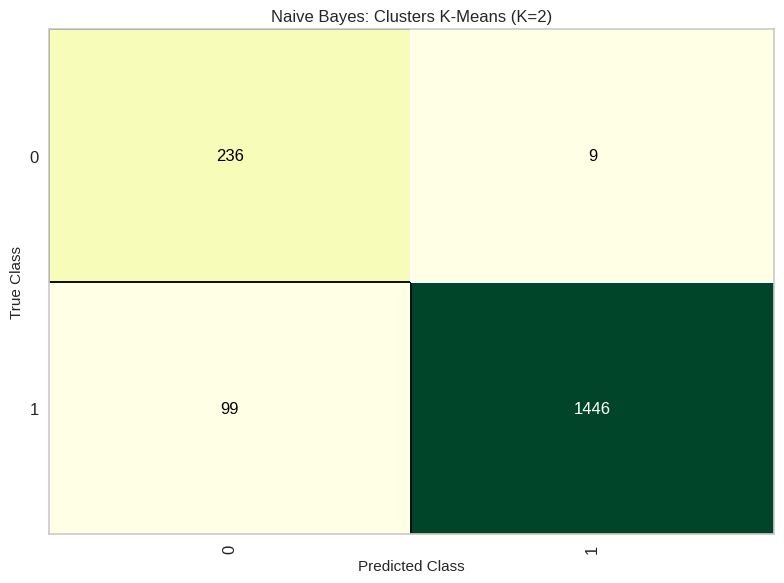

<Axes: title={'center': 'Naive Bayes: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [73]:
# Criando o visualizador para K2
plt.figure(figsize=(8, 6))
cm_k2 = ConfusionMatrix(GaussianNB(), classes=[0, 1], title='Naive Bayes: Clusters K-Means (K=2)', cmap='YlGn')

# Ajustando e avaliando
cm_k2.fit(X_train_k2, y_train_k2)
cm_k2.score(X_test_k2, y_test_k2)

# Finalizando o gráfico
cm_k2.show()

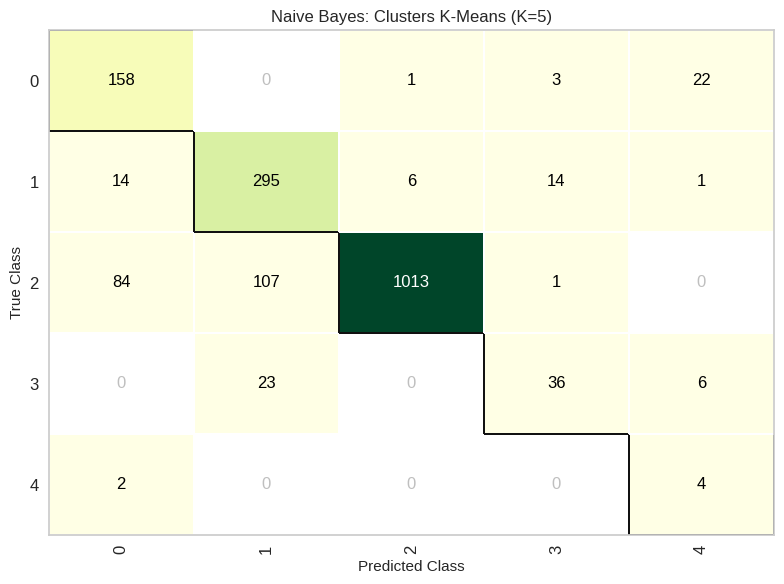

<Axes: title={'center': 'Naive Bayes: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [74]:
# Criando o visualizador para K5
plt.figure(figsize=(8, 6))
cm_k5 = ConfusionMatrix(GaussianNB(), classes=[0, 1, 2, 3, 4], title='Naive Bayes: Clusters K-Means (K=5)', cmap='YlGn')

# Ajustando e avaliando
cm_k5.fit(X_train_k5, y_train_k5)
cm_k5.score(X_test_k5, y_test_k5)

# Finalizando o gráfico
cm_k5.show()

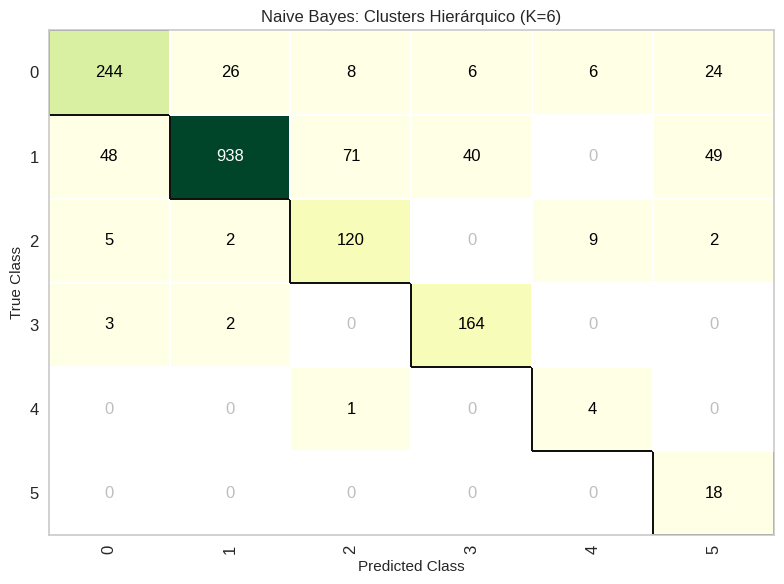

<Axes: title={'center': 'Naive Bayes: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [75]:
# Criando o visualizador para K6
plt.figure(figsize=(8, 6))
cm_h6 = ConfusionMatrix(GaussianNB(), classes=[0, 1, 2, 3, 4, 5], title='Naive Bayes: Clusters Hierárquico (K=6)', cmap='YlGn')

# Ajustando e avaliando
cm_h6.fit(X_train_h6, y_train_h6)
cm_h6.score(X_test_h6, y_test_h6)

# Finalizando o gráfico
cm_h6.show()

## 🌳 Classificação com Árvore de Decisão (Decision Tree)

Diferente do Naive Bayes, a **Árvore de Decisão** segmenta os dados criando regras de decisão baseadas nas características que melhor separam os clusters (ganho de informação).

### Por que usar Árvores?
* **Interpretabilidade:** É possível visualizar exatamente quais variáveis (ex: Limite de Crédito, Compras Totais) definem cada grupo.
* **Não-Linearidade:** Consegue capturar relações complexas entre variáveis que modelos probabilísticos simples podem ignorar.

### Avaliação de Erros (Yellowbrick)
Utilizamos matrizes de confusão individuais para cada configuração de cluster. Espera-se que a Árvore de Decisão apresente uma acurácia superior ao Naive Bayes, especialmente no cenário **K5** e **K6**, onde as fronteiras entre os grupos podem ser mais complexas.

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# 1. Instanciando o modelo
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Função específica para Árvore de Decisão (seguindo o novo padrão)
def avaliar_decision_tree(X_train, y_train, X_test, y_test, nome_cenario):
    # K-Fold (10 dobras)
    scores = cross_val_score(dt_model, X_train, y_train, cv=10)

    # Treino e Predição para métricas detalhadas
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    # Cálculo das métricas weighted
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados Decision Tree: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f} | F1-Score: {f1:.4f}\n")

    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# 3. Executando e armazenando os resultados (objetos dicionário)
res_dt_k2 = avaliar_decision_tree(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_dt_k5 = avaliar_decision_tree(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_dt_h6 = avaliar_decision_tree(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

# 4. Registrando na tabela usando a função 'registrar_resultado' que criamos no passo anterior
registrar_resultado('Decision Tree', 'K-Means K2', res_dt_k2)
registrar_resultado('Decision Tree', 'K-Means K5', res_dt_k5)
registrar_resultado('Decision Tree', 'Hierarquico K6', res_dt_h6)

# 5. Exibir a tabela atualizada
df_resultados.sort_values(by='F1_Score', ascending=False)

--- Resultados Decision Tree: K-Means K2 ---
Acurácia Média (K-Fold): 0.9594 | F1-Score: 0.9704

--- Resultados Decision Tree: K-Means K5 ---
Acurácia Média (K-Fold): 0.9304 | F1-Score: 0.9351

--- Resultados Decision Tree: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.9320 | F1-Score: 0.9163



,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
3,Decision Tree,K-Means K2,0.9594,0.9704,0.9704,0.9704,0.0069
0,Naive Bayes,K-Means K2,0.9441,0.9542,0.9397,0.9434,0.0112
4,Decision Tree,K-Means K5,0.9304,0.9353,0.9352,0.9351,0.0148
5,Decision Tree,Hierarquico K6,0.9320,0.9164,0.9168,0.9163,0.0040
1,Naive Bayes,K-Means K5,0.8605,0.8841,0.8413,0.8532,0.0142
2,Naive Bayes,Hierarquico K6,0.8376,0.8856,0.8313,0.8482,0.0100


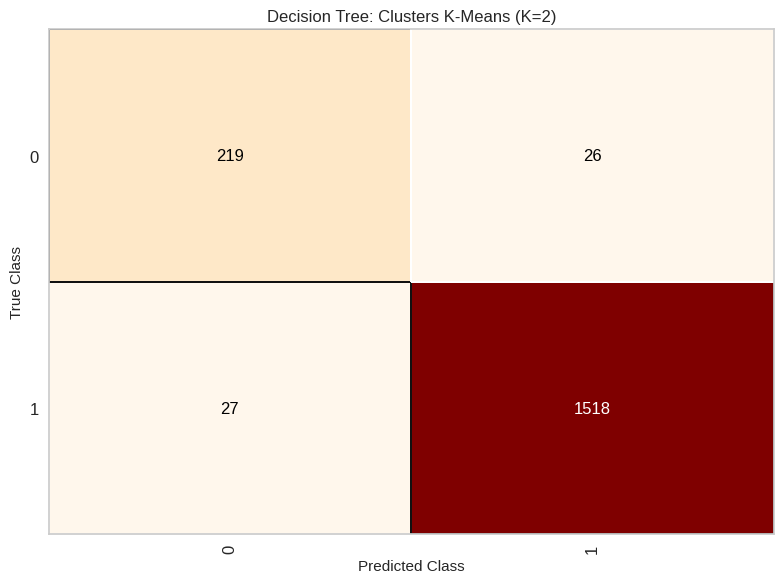

<Axes: title={'center': 'Decision Tree: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [77]:
plt.figure(figsize=(8, 6))
cm_dt_k2 = ConfusionMatrix(DecisionTreeClassifier(random_state=42), classes=[0, 1],
                           title='Decision Tree: Clusters K-Means (K=2)', cmap='OrRd')
cm_dt_k2.fit(X_train_k2, y_train_k2)
cm_dt_k2.score(X_test_k2, y_test_k2)
cm_dt_k2.show()

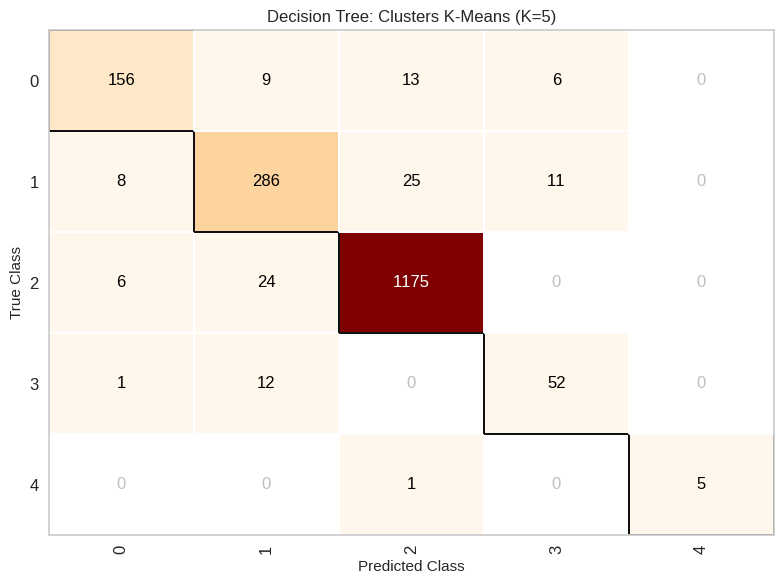

<Axes: title={'center': 'Decision Tree: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
plt.figure(figsize=(8, 6))
cm_dt_k5 = ConfusionMatrix(DecisionTreeClassifier(random_state=42), classes=[0, 1, 2, 3, 4],
                           title='Decision Tree: Clusters K-Means (K=5)', cmap='OrRd')
cm_dt_k5.fit(X_train_k5, y_train_k5)
cm_dt_k5.score(X_test_k5, y_test_k5)
cm_dt_k5.show()

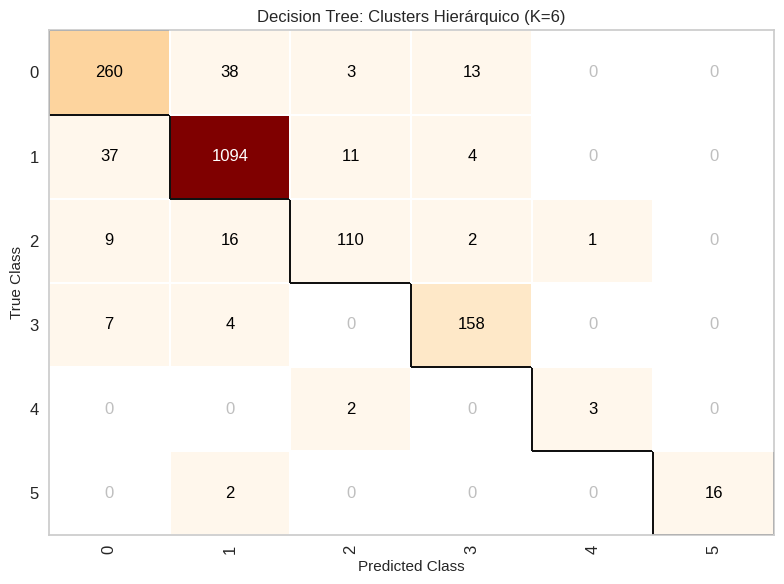

<Axes: title={'center': 'Decision Tree: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
plt.figure(figsize=(8, 6))
cm_dt_h6 = ConfusionMatrix(DecisionTreeClassifier(random_state=42), classes=[0, 1, 2, 3, 4, 5],
                           title='Decision Tree: Clusters Hierárquico (K=6)', cmap='OrRd')
cm_dt_h6.fit(X_train_h6, y_train_h6)
cm_dt_h6.score(X_test_h6, y_test_h6)
cm_dt_h6.show()

## 🌲 Classificação com Random Forest (Floresta Aleatória)

O **Random Forest** foi implementado como uma evolução do modelo de Árvore de Decisão única. Ele utiliza a técnica de *Bagging* para treinar múltiplas árvores de forma independente e combina seus votos para chegar a uma classificação final.

### Por que usar Random Forest?
* **Redução de Variância:** Ao agregar várias árvores, o modelo se torna menos sensível a ruídos nos dados de treino, combatendo o overfitting.
* **Robustez:** Lida muito bem com grandes volumes de dados e múltiplas características (features).
* **Consenso:** A classificação final é baseada na "votação da maioria", o que aumenta a confiança estatística da previsão.

### Avaliação de Performance
Com o uso de **10-Fold Cross-Validation**, observamos a estabilidade do modelo em diferentes partições dos dados. As matrizes de confusão geradas com **Yellowbrick** (esquema de cores `Purples`) permitem identificar se a combinação de múltiplas árvores conseguiu resolver as ambiguidades que o Naive Bayes ou a Decision Tree simples apresentaram nos clusters mais densos (**K5** e **K6**).

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# 1. Instanciando o modelo
rf_model = RandomForestClassifier(random_state=42)

# 2. Função específica para Random Forest (seguindo o novo padrão de dicionário)
def avaliar_random_forest(X_train, y_train, X_test, y_test, nome_cenario):
    # K-Fold (10 dobras) nos dados de treino
    scores = cross_val_score(rf_model, X_train, y_train, cv=10)

    # Treino e Predição para métricas detalhadas (no conjunto de teste)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Cálculo das métricas weighted
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados Random Forest: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f} | F1-Score: {f1:.4f}\n")

    # Retorna o dicionário para a função registrar_resultado
    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# 3. Executando e armazenando os resultados
res_rf_k2 = avaliar_random_forest(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_rf_k5 = avaliar_random_forest(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_rf_h6 = avaliar_random_forest(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

# 4. Registrando na tabela usando a função 'registrar_resultado'
registrar_resultado('Random Forest', 'K-Means K2', res_rf_k2)
registrar_resultado('Random Forest', 'K-Means K5', res_rf_k5)
registrar_resultado('Random Forest', 'Hierarquico K6', res_rf_h6)

# 5. Exibir a tabela atualizada para comparação final
df_resultados.sort_values(by='F1_Score', ascending=False)

--- Resultados Random Forest: K-Means K2 ---
Acurácia Média (K-Fold): 0.9795 | F1-Score: 0.9787

--- Resultados Random Forest: K-Means K5 ---
Acurácia Média (K-Fold): 0.9617 | F1-Score: 0.9539

--- Resultados Random Forest: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.9567 | F1-Score: 0.9499



,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
6,Random Forest,K-Means K2,0.9795,0.9786,0.9788,0.9787,0.0048
3,Decision Tree,K-Means K2,0.9594,0.9704,0.9704,0.9704,0.0069
7,Random Forest,K-Means K5,0.9617,0.9542,0.9542,0.9539,0.0071
8,Random Forest,Hierarquico K6,0.9567,0.9498,0.9503,0.9499,0.0055
0,Naive Bayes,K-Means K2,0.9441,0.9542,0.9397,0.9434,0.0112
4,Decision Tree,K-Means K5,0.9304,0.9353,0.9352,0.9351,0.0148
5,Decision Tree,Hierarquico K6,0.9320,0.9164,0.9168,0.9163,0.0040
1,Naive Bayes,K-Means K5,0.8605,0.8841,0.8413,0.8532,0.0142
2,Naive Bayes,Hierarquico K6,0.8376,0.8856,0.8313,0.8482,0.0100


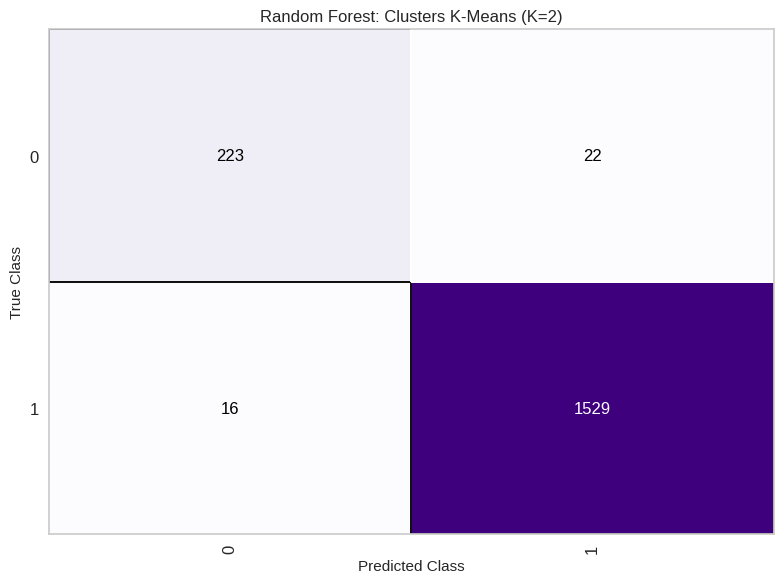

<Axes: title={'center': 'Random Forest: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [81]:
plt.figure(figsize=(8, 6))
cm_rf_k2 = ConfusionMatrix(RandomForestClassifier(random_state=42), classes=[0, 1],
                           title='Random Forest: Clusters K-Means (K=2)', cmap='Purples')
cm_rf_k2.fit(X_train_k2, y_train_k2)
cm_rf_k2.score(X_test_k2, y_test_k2)
cm_rf_k2.show()

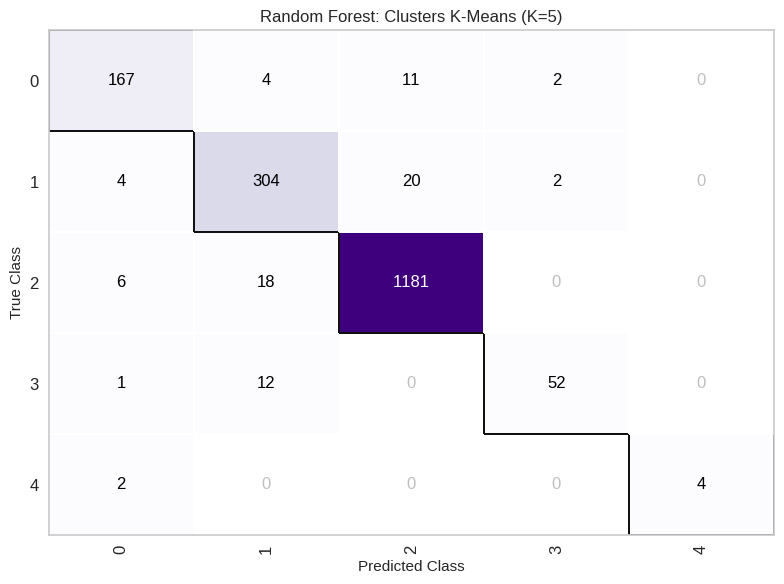

<Axes: title={'center': 'Random Forest: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [82]:
plt.figure(figsize=(8, 6))
cm_rf_k5 = ConfusionMatrix(RandomForestClassifier(random_state=42), classes=[0, 1, 2, 3, 4],
                           title='Random Forest: Clusters K-Means (K=5)', cmap='Purples')
cm_rf_k5.fit(X_train_k5, y_train_k5)
cm_rf_k5.score(X_test_k5, y_test_k5)
cm_rf_k5.show()

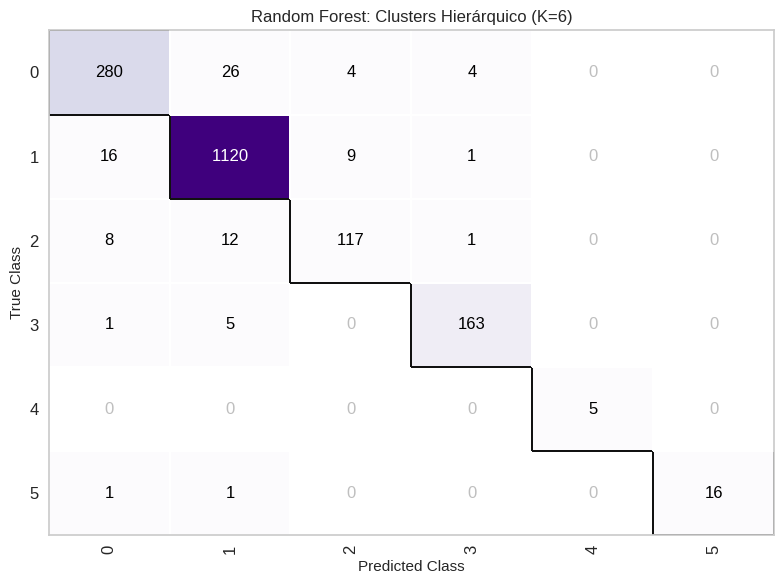

<Axes: title={'center': 'Random Forest: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [83]:
plt.figure(figsize=(8, 6))
cm_rf_h6 = ConfusionMatrix(RandomForestClassifier(random_state=42), classes=[0, 1, 2, 3, 4, 5],
                           title='Random Forest: Clusters Hierárquico (K=6)', cmap='Purples')
cm_rf_h6.fit(X_train_h6, y_train_h6)
cm_rf_h6.score(X_test_h6, y_test_h6)
cm_rf_h6.show()

## 📍 Classificação com K-Nearest Neighbors (KNN)

O algoritmo **KNN** classifica cada amostra com base na maioria dos votos dos seus $k$ vizinhos mais próximos no espaço de atributos.

### Características do Modelo:
* **Algoritmo Preguiçoso (Lazy Learner):** Ele não "aprende" uma função; ele armazena o dataset e realiza cálculos de distância (geralmente Euclidiana) no momento da predição.
* **Sensibilidade à Escala:** Por depender de distâncias, o KNN performa melhor quando os dados estão normalizados ou padronizados.
* **Complexidade:** É eficaz para encontrar fronteiras de decisão não lineares e complexas entre os clusters.

### Insights da Matriz de Confusão:
As matrizes geradas com o **Yellowbrick** ajudam a verificar se os clusters criados são densos e bem separados. Se o KNN apresentar muitos erros, pode indicar que as fronteiras entre os grupos (especialmente no **K6**) estão muito sobrepostas ou que há ruído nos dados.

In [85]:

# 1. Instanciando o modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. Função específica para KNN (seguindo o padrão de dicionário)
def avaliar_knn(X_train, y_train, X_test, y_test, nome_cenario):
    # K-Fold (10 dobras) nos dados de treino
    scores = cross_val_score(knn_model, X_train, y_train, cv=10)

    # Treino e Predição para métricas detalhadas (no conjunto de teste)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    # Cálculo das métricas weighted
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados KNN: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f} | F1-Score: {f1:.4f}\n")

    # Retorna o dicionário para a função registrar_resultado
    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# 3. Executando e armazenando os resultados
res_knn_k2 = avaliar_knn(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_knn_k5 = avaliar_knn(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_knn_h6 = avaliar_knn(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

# 4. Registrando na tabela usando a função 'registrar_resultado'
registrar_resultado('KNN', 'K-Means K2', res_knn_k2)
registrar_resultado('KNN', 'K-Means K5', res_knn_k5)
registrar_resultado('KNN', 'Hierarquico K6', res_knn_h6)

# 5. Exibir a tabela atualizada para comparação
df_resultados.sort_values(by='F1_Score', ascending=False)

--- Resultados KNN: K-Means K2 ---
Acurácia Média (K-Fold): 0.9789 | F1-Score: 0.9781

--- Resultados KNN: K-Means K5 ---
Acurácia Média (K-Fold): 0.9578 | F1-Score: 0.9542

--- Resultados KNN: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.9711 | F1-Score: 0.9708



,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
6,Random Forest,K-Means K2,0.9795,0.9786,0.9788,0.9787,0.0048
9,KNN,K-Means K2,0.9789,0.9789,0.9788,0.9781,0.0036
11,KNN,Hierarquico K6,0.9711,0.9708,0.9709,0.9708,0.0070
3,Decision Tree,K-Means K2,0.9594,0.9704,0.9704,0.9704,0.0069
10,KNN,K-Means K5,0.9578,0.9544,0.9547,0.9542,0.0053
7,Random Forest,K-Means K5,0.9617,0.9542,0.9542,0.9539,0.0071
8,Random Forest,Hierarquico K6,0.9567,0.9498,0.9503,0.9499,0.0055
0,Naive Bayes,K-Means K2,0.9441,0.9542,0.9397,0.9434,0.0112
4,Decision Tree,K-Means K5,0.9304,0.9353,0.9352,0.9351,0.0148
5,Decision Tree,Hierarquico K6,0.9320,0.9164,0.9168,0.9163,0.0040


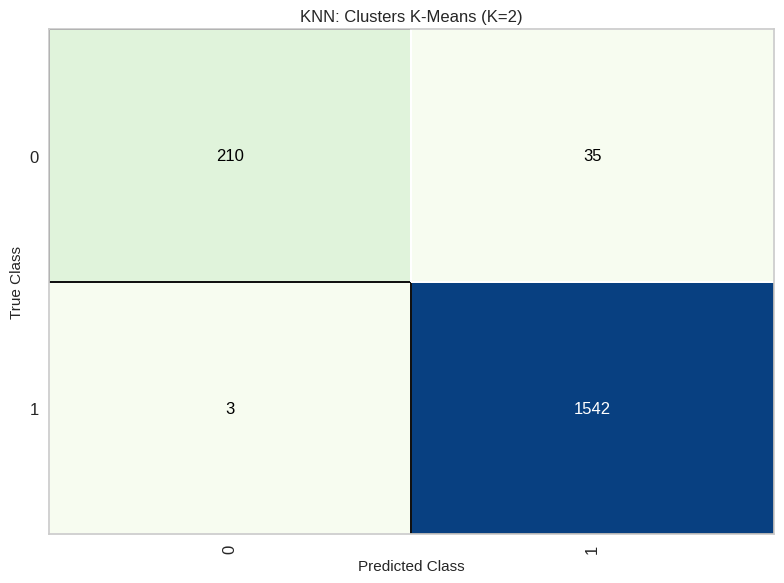

<Axes: title={'center': 'KNN: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [86]:
plt.figure(figsize=(8, 6))
cm_knn_k2 = ConfusionMatrix(KNeighborsClassifier(), classes=[0, 1],
                            title='KNN: Clusters K-Means (K=2)', cmap='GnBu')
cm_knn_k2.fit(X_train_k2, y_train_k2)
cm_knn_k2.score(X_test_k2, y_test_k2)
cm_knn_k2.show()

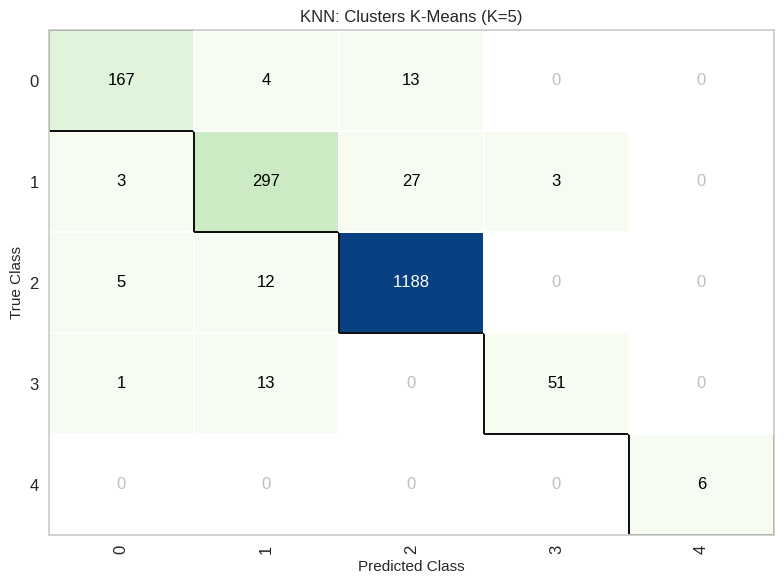

<Axes: title={'center': 'KNN: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [87]:
plt.figure(figsize=(8, 6))
cm_knn_k5 = ConfusionMatrix(KNeighborsClassifier(), classes=[0, 1, 2, 3, 4],
                            title='KNN: Clusters K-Means (K=5)', cmap='GnBu')
cm_knn_k5.fit(X_train_k5, y_train_k5)
cm_knn_k5.score(X_test_k5, y_test_k5)
cm_knn_k5.show()

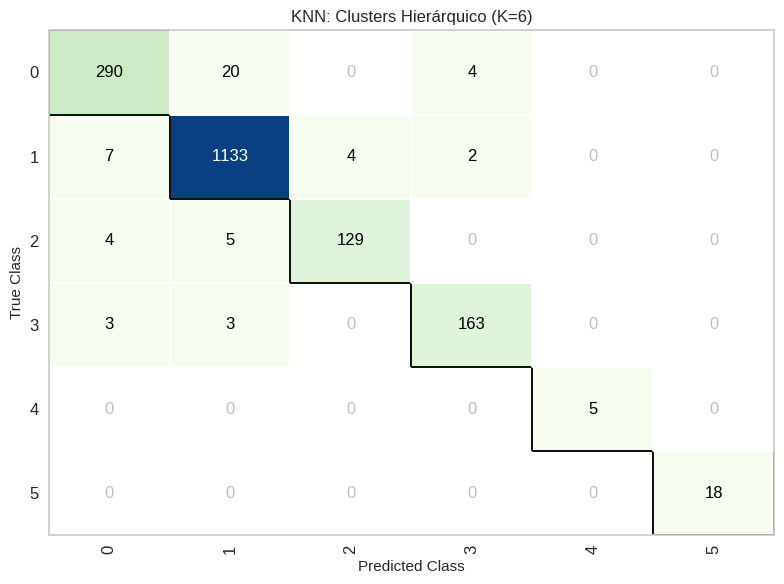

<Axes: title={'center': 'KNN: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [88]:
plt.figure(figsize=(8, 6))
cm_knn_h6 = ConfusionMatrix(KNeighborsClassifier(), classes=[0, 1, 2, 3, 4, 5],
                            title='KNN: Clusters Hierárquico (K=6)', cmap='GnBu')
cm_knn_h6.fit(X_train_h6, y_train_h6)
cm_knn_h6.score(X_test_h6, y_test_h6)
cm_knn_h6.show()

## 🚀 Classificação com Gradient Boosting

O **Gradient Boosting** é uma técnica de aprendizado de máquina que produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos, geralmente árvores de decisão.

### Como ele funciona:
* **Aprendizado Sequencial:** Ao contrário do Random Forest, as árvores no Gradient Boosting são construídas uma após a outra.
* **Otimização:** Cada nova árvore é treinada para minimizar a função de perda (o erro) do modelo combinado anterior, usando um algoritmo de descida de gradiente.
* **Alta Performance:** É conhecido por ser um dos classificadores mais precisos para dados estruturados, conseguindo captar nuances muito sutis na separação dos clusters.

### Análise de Matriz:
As matrizes do **Yellowbrick** para este modelo tendem a mostrar uma diagonal principal muito forte. Se houver erros aqui, é um forte indicativo de que os dados nos clusters em questão são matematicamente quase indistinguíveis.

In [89]:
# 1. Instanciando o modelo
gb_model = GradientBoostingClassifier(random_state=42)

# 2. Função específica para Gradient Boosting (novo padrão)
def avaliar_gradient_boosting(X_train, y_train, X_test, y_test, nome_cenario):
    # K-Fold (10 dobras) nos dados de treino
    scores = cross_val_score(gb_model, X_train, y_train, cv=10)

    # Treino e Predição para métricas detalhadas (no conjunto de teste)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    # Cálculo das métricas weighted
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados Gradient Boosting: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f} | F1-Score: {f1:.4f}\n")

    # Retorna o dicionário para a função registrar_resultado
    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# 3. Executando e armazenando os resultados
res_gb_k2 = avaliar_gradient_boosting(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_gb_k5 = avaliar_gradient_boosting(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_gb_h6 = avaliar_gradient_boosting(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

# 4. Registrando na tabela usando a função 'registrar_resultado'
registrar_resultado('Gradient Boosting', 'K-Means K2', res_gb_k2)
registrar_resultado('Gradient Boosting', 'K-Means K5', res_gb_k5)
registrar_resultado('Gradient Boosting', 'Hierarquico K6', res_gb_h6)

# 5. Exibir a tabela atualizada para comparação
df_resultados.sort_values(by='F1_Score', ascending=False)

--- Resultados Gradient Boosting: K-Means K2 ---
Acurácia Média (K-Fold): 0.9821 | F1-Score: 0.9826

--- Resultados Gradient Boosting: K-Means K5 ---
Acurácia Média (K-Fold): 0.9686 | F1-Score: 0.9657

--- Resultados Gradient Boosting: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.9514 | F1-Score: 0.9445



,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
12,Gradient Boosting,K-Means K2,0.9821,0.9825,0.9827,0.9826,0.0060
6,Random Forest,K-Means K2,0.9795,0.9786,0.9788,0.9787,0.0048
9,KNN,K-Means K2,0.9789,0.9789,0.9788,0.9781,0.0036
11,KNN,Hierarquico K6,0.9711,0.9708,0.9709,0.9708,0.0070
3,Decision Tree,K-Means K2,0.9594,0.9704,0.9704,0.9704,0.0069
13,Gradient Boosting,K-Means K5,0.9686,0.9657,0.9659,0.9657,0.0058
10,KNN,K-Means K5,0.9578,0.9544,0.9547,0.9542,0.0053
7,Random Forest,K-Means K5,0.9617,0.9542,0.9542,0.9539,0.0071
8,Random Forest,Hierarquico K6,0.9567,0.9498,0.9503,0.9499,0.0055
14,Gradient Boosting,Hierarquico K6,0.9514,0.9446,0.9453,0.9445,0.0087


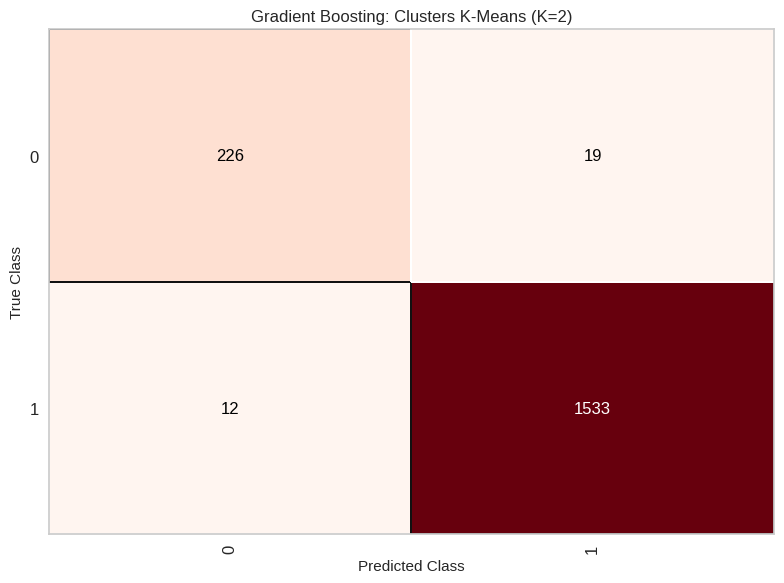

<Axes: title={'center': 'Gradient Boosting: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [90]:
plt.figure(figsize=(8, 6))
cm_gb_k2 = ConfusionMatrix(GradientBoostingClassifier(random_state=42), classes=[0, 1],
                            title='Gradient Boosting: Clusters K-Means (K=2)', cmap='Reds')
cm_gb_k2.fit(X_train_k2, y_train_k2)
cm_gb_k2.score(X_test_k2, y_test_k2)
cm_gb_k2.show()

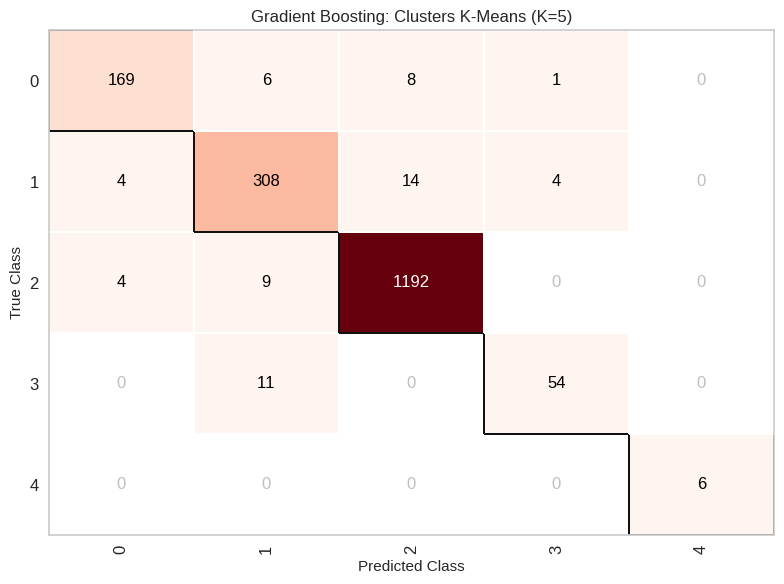

<Axes: title={'center': 'Gradient Boosting: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [92]:
plt.figure(figsize=(8, 6))
cm_gb_k5 = ConfusionMatrix(GradientBoostingClassifier(random_state=42), classes=[0, 1, 2, 3, 4],
                            title='Gradient Boosting: Clusters K-Means (K=5)', cmap='Reds')
cm_gb_k5.fit(X_train_k5, y_train_k5)
cm_gb_k5.score(X_test_k5, y_test_k5)
cm_gb_k5.show()

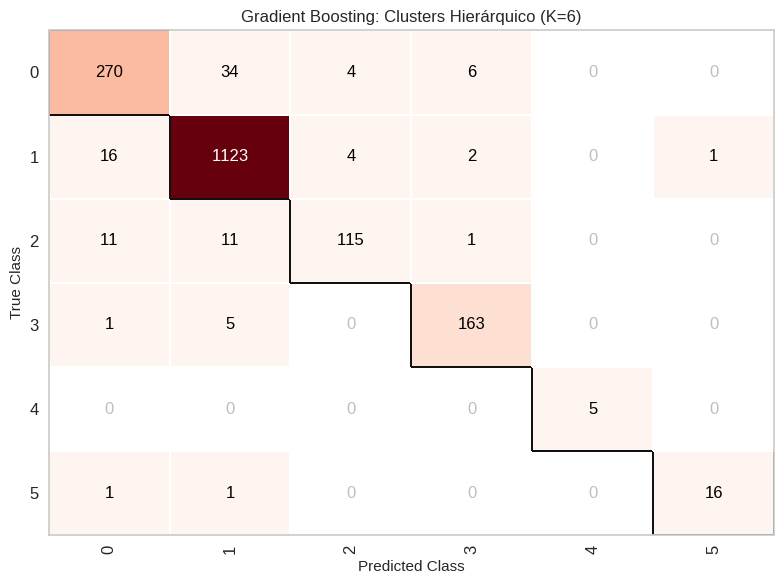

<Axes: title={'center': 'Gradient Boosting: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [93]:
plt.figure(figsize=(8, 6))
cm_gb_h6 = ConfusionMatrix(GradientBoostingClassifier(random_state=42), classes=[0, 1, 2, 3, 4, 5],
                            title='Gradient Boosting: Clusters Hierárquico (K=6)', cmap='Reds')
cm_gb_h6.fit(X_train_h6, y_train_h6)
cm_gb_h6.score(X_test_h6, y_test_h6)
cm_gb_h6.show()

## 🧠 Classificação com Redes Neurais (MLP Classifier)

O **MLP (Multi-layer Perceptron)** é um algoritmo de redes neurais artificiais que utiliza retropropagação (*backpropagation*) para aprender as fronteiras entre os clusters.

### Arquitetura do Modelo:
* **Camadas Ocultas:** O modelo foi configurado com múltiplas camadas de neurônios para processar interações complexas entre os atributos.
* **Função de Ativação:** Utiliza funções não-lineares (como ReLU) para permitir que a rede aprenda padrões que não são apenas linhas retas no espaço de dados.
* **Sensibilidade:** Redes neurais são altamente dependentes da qualidade dos dados e da normalização das features.

### Insights das Matrizes:
Através do **Yellowbrick**, observamos como a rede neural lida com a classificação múltipla (**K5** e **K6**). Se o MLP apresentar uma acurácia superior aos modelos de árvore, isso indica que há relações latentes e não-lineares fortes nos dados que os clusters conseguiram capturar.

In [94]:

# 1. Instanciando o modelo
mlp_model = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50))

# 2. Função específica para MLP (novo padrão de dicionário)
def avaliar_mlp(X_train, y_train, X_test, y_test, nome_cenario):
    # K-Fold (10 dobras) nos dados de treino
    scores = cross_val_score(mlp_model, X_train, y_train, cv=10)

    # Treino e Predição para métricas detalhadas (no conjunto de teste)
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)

    # Cálculo das métricas weighted
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"--- Resultados MLP Neural Network: {nome_cenario} ---")
    print(f"Acurácia Média (K-Fold): {scores.mean():.4f} | F1-Score: {f1:.4f}\n")

    # Retorna o dicionário para a função registrar_resultado
    return {
        'acc': scores.mean(),
        'prec': precision,
        'rec': recall,
        'f1': f1,
        'std': scores.std()
    }

# 3. Executando e armazenando os resultados
res_mlp_k2 = avaliar_mlp(X_train_k2, y_train_k2, X_test_k2, y_test_k2, "K-Means K2")
res_mlp_k5 = avaliar_mlp(X_train_k5, y_train_k5, X_test_k5, y_test_k5, "K-Means K5")
res_mlp_h6 = avaliar_mlp(X_train_h6, y_train_h6, X_test_h6, y_test_h6, "Hierárquico K6")

# 4. Registrando na tabela usando a função 'registrar_resultado'
registrar_resultado('MLP Neural Network', 'K-Means K2', res_mlp_k2)
registrar_resultado('MLP Neural Network', 'K-Means K5', res_mlp_k5)
registrar_resultado('MLP Neural Network', 'Hierarquico K6', res_mlp_h6)

# 5. Exibir a tabela consolidada final
df_resultados.sort_values(by='F1_Score', ascending=False)

--- Resultados MLP Neural Network: K-Means K2 ---
Acurácia Média (K-Fold): 0.9951 | F1-Score: 0.9955

--- Resultados MLP Neural Network: K-Means K5 ---
Acurácia Média (K-Fold): 0.9899 | F1-Score: 0.9862

--- Resultados MLP Neural Network: Hierárquico K6 ---
Acurácia Média (K-Fold): 0.9631 | F1-Score: 0.9636



,Algoritmo,Dataset,Acuracia_Media,Precision,Recall,F1_Score,Desvio_Padrao
15,MLP Neural Network,K-Means K2,0.9951,0.9956,0.9955,0.9955,0.0018
16,MLP Neural Network,K-Means K5,0.9899,0.9872,0.9860,0.9862,0.0016
12,Gradient Boosting,K-Means K2,0.9821,0.9825,0.9827,0.9826,0.0060
6,Random Forest,K-Means K2,0.9795,0.9786,0.9788,0.9787,0.0048
9,KNN,K-Means K2,0.9789,0.9789,0.9788,0.9781,0.0036
11,KNN,Hierarquico K6,0.9711,0.9708,0.9709,0.9708,0.0070
3,Decision Tree,K-Means K2,0.9594,0.9704,0.9704,0.9704,0.0069
13,Gradient Boosting,K-Means K5,0.9686,0.9657,0.9659,0.9657,0.0058
17,MLP Neural Network,Hierarquico K6,0.9631,0.9640,0.9637,0.9636,0.0063
10,KNN,K-Means K5,0.9578,0.9544,0.9547,0.9542,0.0053


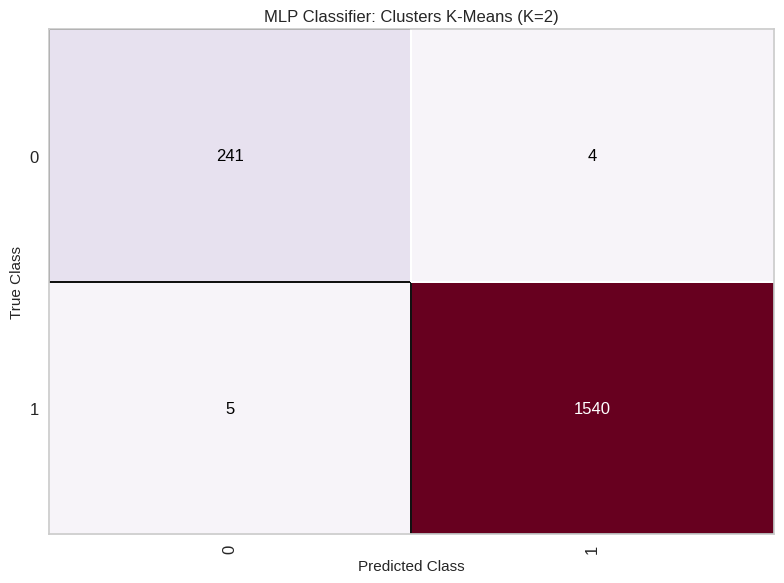

<Axes: title={'center': 'MLP Classifier: Clusters K-Means (K=2)'}, xlabel='Predicted Class', ylabel='True Class'>

In [95]:
plt.figure(figsize=(8, 6))
cm_mlp_k2 = ConfusionMatrix(MLPClassifier(random_state=42, max_iter=500), classes=[0, 1],
                            title='MLP Classifier: Clusters K-Means (K=2)', cmap='PuRd')
cm_mlp_k2.fit(X_train_k2, y_train_k2)
cm_mlp_k2.score(X_test_k2, y_test_k2)
cm_mlp_k2.show()

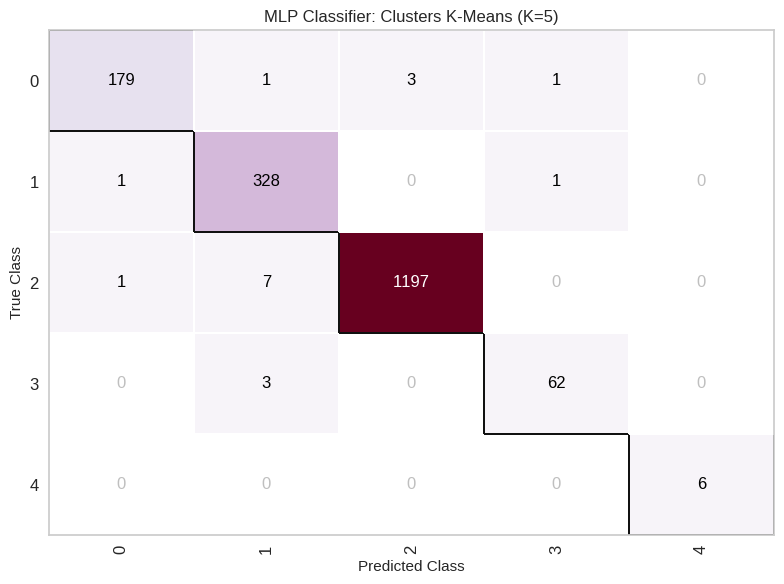

<Axes: title={'center': 'MLP Classifier: Clusters K-Means (K=5)'}, xlabel='Predicted Class', ylabel='True Class'>

In [96]:
plt.figure(figsize=(8, 6))
cm_mlp_k5 = ConfusionMatrix(MLPClassifier(random_state=42, max_iter=500), classes=[0, 1, 2, 3, 4],
                            title='MLP Classifier: Clusters K-Means (K=5)', cmap='PuRd')
cm_mlp_k5.fit(X_train_k5, y_train_k5)
cm_mlp_k5.score(X_test_k5, y_test_k5)
cm_mlp_k5.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


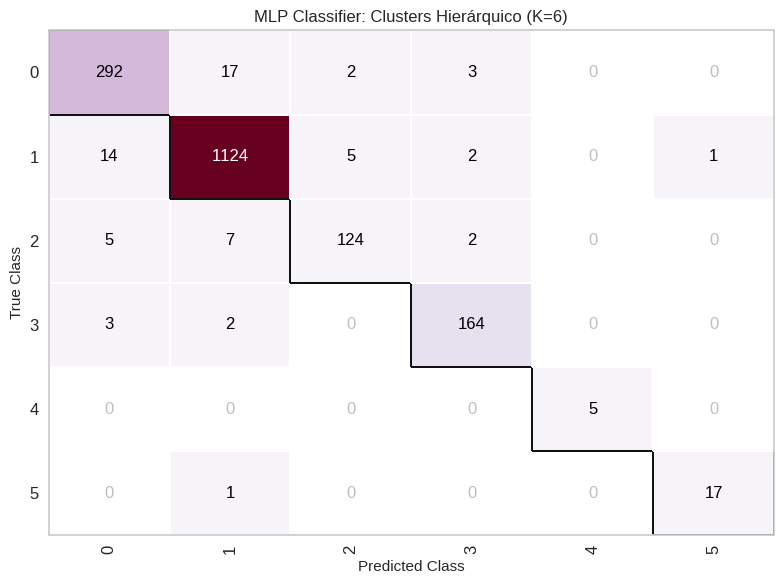

<Axes: title={'center': 'MLP Classifier: Clusters Hierárquico (K=6)'}, xlabel='Predicted Class', ylabel='True Class'>

In [97]:
plt.figure(figsize=(8, 6))
cm_mlp_h6 = ConfusionMatrix(MLPClassifier(random_state=42, max_iter=500), classes=[0, 1, 2, 3, 4, 5],
                            title='MLP Classifier: Clusters Hierárquico (K=6)', cmap='PuRd')
cm_mlp_h6.fit(X_train_h6, y_train_h6)
cm_mlp_h6.score(X_test_h6, y_test_h6)
cm_mlp_h6.show()

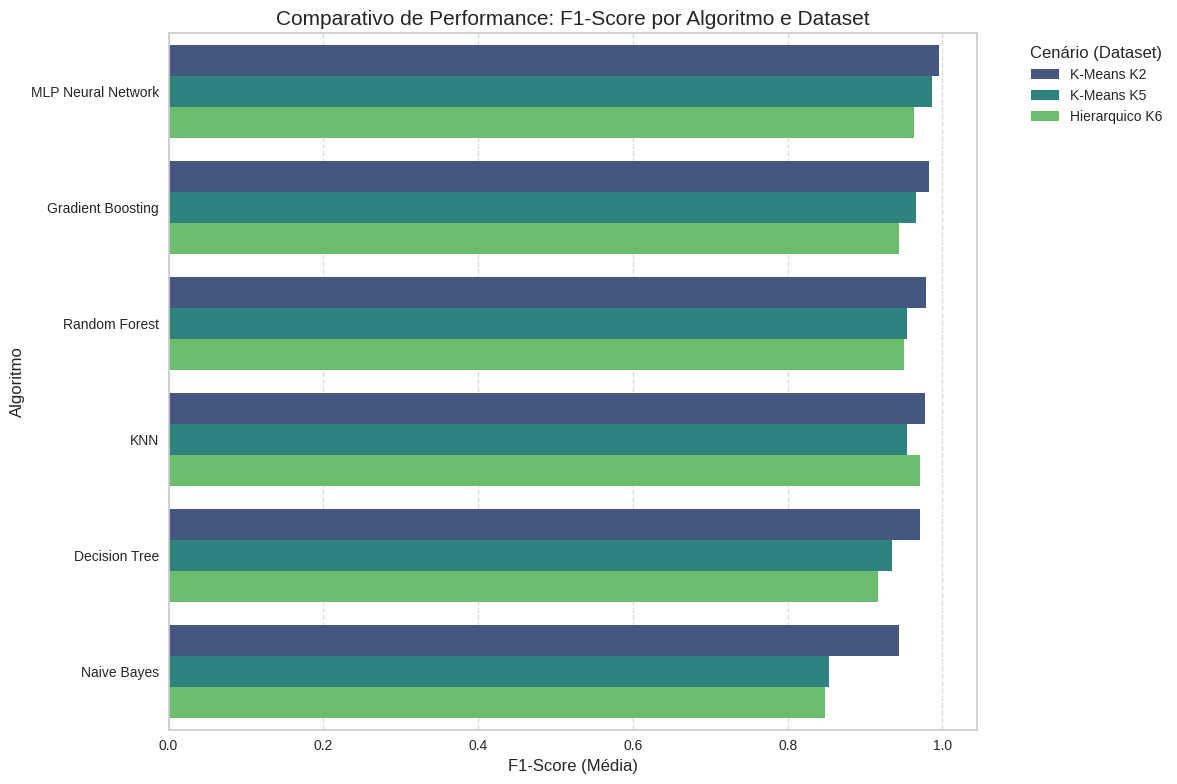

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar para o gráfico ficar bonito
df_plot = df_resultados.sort_values(by='F1_Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_plot, x='F1_Score', y='Algoritmo', hue='Dataset', palette='viridis')

plt.title('Comparativo de Performance: F1-Score por Algoritmo e Dataset', fontsize=15)
plt.xlabel('F1-Score (Média)', fontsize=12)
plt.ylabel('Algoritmo', fontsize=12)
plt.legend(title='Cenário (Dataset)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [99]:
from google.colab import files

# Ordenar antes de salvar para que o melhor modelo fique no topo do arquivo
df_resultados_final = df_resultados.sort_values(by='F1_Score', ascending=False)

# Salvar como CSV
df_resultados_final.to_csv('resultado_modelos_clusters.csv', index=False, sep=';', encoding='utf-8-sig')

# Comando para baixar o arquivo no seu computador
files.download('resultado_modelos_clusters.csv')

print("✅ Arquivo 'resultado_modelos_clusters.csv' gerado e pronto para download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Arquivo 'resultado_modelos_clusters.csv' gerado e pronto para download!
